break


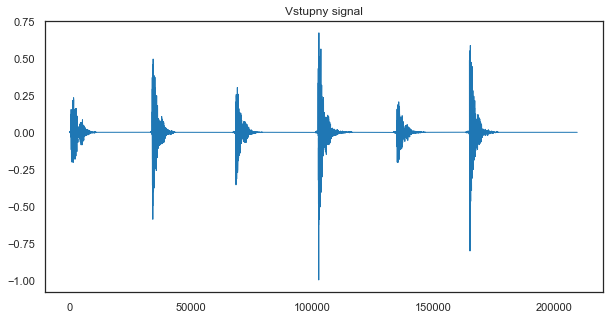

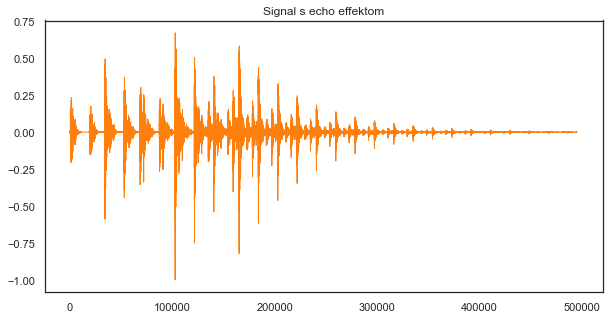

In [15]:
import os
import math
import time
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import sounddevice as sd
from pydub import AudioSegment
import librosa
import librosa.display
import IPython.display as ipd
from pydub import AudioSegment
from itertools import cycle
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

def echoFB (x,Fs,delayTime,a,prah):
    Nx = len(x)
    Ny = 100 * Nx
    v = np.zeros((Ny,1))
    y = v.flatten()
    dSamples =  math.ceil(delayTime * Fs)
    for n in range(Ny):
        if n <= dSamples:
            # prvych dSamples vzoriek vystupu kopiruje vstup
            y[n] = x[n]
        elif n <= Nx-1:
            # kym nepride posledna vzorka vstupneho signalu na vystupe je vstupny signal a oneskoreny vystupny signal
            y[n] = x[n] + a * y[n - dSamples];
        else:
            # Po skonceni vstupneho signalu je na vystupe uz len oneskoreny vystupny signal 
            y[n] = a * y[n - dSamples];
            # Sledovanie intenzity signalu
            En = abs(y[n - dSamples]);
            En = En + abs(y[n - dSamples + 1]);
#            for i in range(dSamples):
#                En = En + abs(y[n - dSamples + i]); # ten cyklus bezi velmi dlho, pozriel som pocet operacie 'n' v matlabe 
            En = En / dSamples;
            Ny = n;
            if n > 495804: #'n' - pocet cyklov ktory dostal som v matlabe
                print("break")
                break
    arr=y[1:Ny]            
    return arr 
# Konverzia na mono
sound = AudioSegment.from_file("../git/sounds/hit_loop.wav")
if sound.channels == 2:
    sound = sound.set_channels(1)

    
fn_wav = os.path.join('..', 'git', 'sounds', 'hit_loop.wav')
x, Fs = librosa.load(fn_wav, sr=None)

# Ak pozname tempo nahravky v uderoch za minutu (BPM) 
beatsPerMin = 140;
# Vypocet oneskorenia v sekundach
delaySec = 60/beatsPerMin;
# Zosilnenie oneskorovacej vetvy 
a = 0.75; 
# Prahova konstanta (sleduje pokles energie vystupneho signalu)
Prah = 0.01;
y  = echoFB(x,Fs,delaySec,a,Prah)

pd.Series(x).plot(figsize=(10,5),
                  lw=1,
                  title='Vstupny signal',
                  color=color_pal[0])

plt.show()
pd.Series(y).plot(figsize=(10,5),
                  lw=1,
                  title='Signal s echo effektom',
                  color=color_pal[1])

plt.show()

In [13]:
#Nacitanie file a vypocet trvalosti audia
sound = AudioSegment.from_file("../git/sounds/hit_loop.wav")
sound.duration_seconds == (len(sound) / 1000.0)
seconds_duration = round((sound.duration_seconds % 60),3)
                         
sd.play(x, Fs)
time.sleep(seconds_duration + 1)
sd.play(y, Fs)